In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import TruncatedSVD

In [2]:
songs = pd.read_csv('songs_final422.csv')

In [3]:
songs.shape[0]

10380

In [11]:
X = songs['Stemmed No Stop Words']

In [5]:
y = songs['Genre']

In [6]:
le = LabelEncoder()
y_le = le.fit_transform(y)

In [7]:
print("Classes:", le.classes_)

Classes: ['Country' 'EDM' 'Pop' 'R&B' 'Rap' 'Rock']


In [12]:
#we need to vectorize X since SVM can not interpret raw text
bagofwords = CountVectorizer()
X = bagofwords.fit_transform(X)

In [14]:
#non-negative matrix factorization applied into a dense vector
X_train, X_test, y_train, y_test = train_test_split(X, y_le, test_size=0.20, random_state=51)

In [15]:
#a base model without adjusting class_weights to account for class imbalance
nbmodel3 = MultinomialNB()

In [16]:
nbmodel3.fit(X_train, y_train)

MultinomialNB()

In [17]:
nb3_predictions = nbmodel3.predict(X_test)

In [18]:
nb3_report = classification_report(y_test, nb3_predictions, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
print(nb3_report)

              precision    recall  f1-score   support

     Country       0.26      0.12      0.16        85
         EDM       0.46      0.13      0.20       233
         Pop       0.51      0.62      0.56       742
         R&B       0.28      0.11      0.16       169
         Rap       0.75      0.75      0.75       412
        Rock       0.46      0.61      0.52       435

    accuracy                           0.53      2076
   macro avg       0.45      0.39      0.39      2076
weighted avg       0.51      0.53      0.50      2076



In [19]:
# create a confusion matrix for the balanced model
nb3_cm = confusion_matrix(y_test, nb3_predictions)


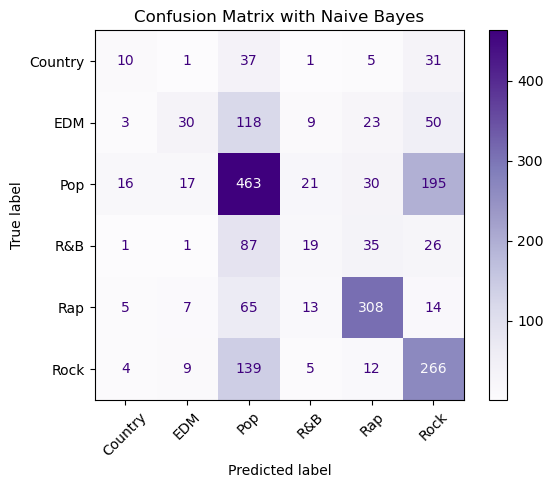

In [25]:
# plot the confusion matrix
nb3_cm_plot = ConfusionMatrixDisplay(confusion_matrix=nb3_cm, display_labels=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])
nb3_cm_plot.plot(cmap=plt.cm.Purples, xticks_rotation=45)
plt.title("Confusion Matrix with Naive Bayes")
plt.show()

In [ ]:
#radar plots

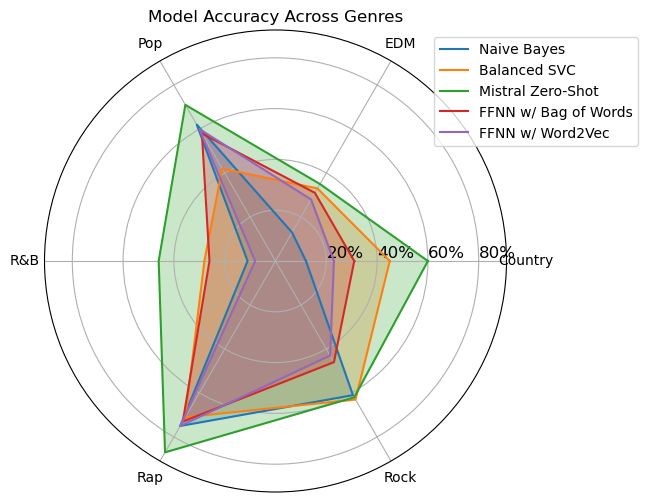

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
models = ["Naive Bayes", "Balanced SVC", "Mistral Zero-Shot"]
genres = ["Country", "EDM", "Pop", "R&B", "Rap", "Rock"]
model_accuracies = {
    "Naive Bayes": [0.12, 0.13, 0.62, 0.11, 0.75, 0.61],
    "Balanced SVC": [0.45, 0.33, 0.42, 0.28, 0.71, 0.63],
    "Mistral Zero-Shot": [0.60, 0.35, 0.71, 0.46, 0.87, 0.62],
    "FFNN w/ Bag of Words": [.31,.31,.58,.26,.73,.46],
    "FFNN w/ Word2Vec": [.23, .28, .60, .08, .75, .43]
}

# Radar plot function with jittered ticks
def radar_plot_with_jitter(data, labels):
    num_classes = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_classes, endpoint=False).tolist()
    angles += angles[:1]  # Close the circle

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    for model_name, scores in data.items():
        scores += scores[:1]  # Close the data points
        ax.plot(angles, scores, label=model_name)
        ax.fill(angles, scores, alpha=0.25)

    # Radial tick marks with jitter
    tick_positions = [0.2, 0.4, 0.6, 0.8]
    jittered_labels = [f"{int(tick * 100)}%" for tick in tick_positions]
    jittered_angles = [angle + np.random.uniform(-0.05, 0.05) for angle in tick_positions]  # Introduce jitter

    ax.set_rgrids(tick_positions, labels=jittered_labels, angle=0, fontsize=12)
    ax.set_rticks(tick_positions)  # Adjusting tick positions (these are the main radial ticks)

    # Set labels and legend
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title("Model Accuracy Across Genres")
    plt.show()

# Call the function with jittered ticks
radar_plot_with_jitter(model_accuracies, genres)

In [20]:
#getting value counts for class frequency

songs['Genre'].value_counts()

Genre
Pop        3757
Rock       2188
Rap        2044
EDM        1125
R&B         854
Country     412
Name: count, dtype: int64

In [36]:
#stratified baseline

class_labels = [0,1,2,3,4,5]
class_probabilities = [.04, .108, .362, .082, .197, .211]

stratified_baseline = np.random.choice(class_labels, size=10380, p=class_probabilities)

baseline_report = classification_report(y_le, stratified_baseline, target_names=["Country", "EDM", "Pop", "R&B", "Rap", "Rock"])

print(baseline_report)

       #   Stratified Baseline Classification Report

              precision    recall  f1-score   support

     Country       0.03      0.03      0.03       412
         EDM       0.11      0.11      0.11      1125
         Pop       0.37      0.37      0.37      3757
         R&B       0.09      0.09      0.09       854
         Rap       0.22      0.22      0.22      2044
        Rock       0.20      0.20      0.20      2188

    accuracy                           0.24     10380
   macro avg       0.17      0.17      0.17     10380
weighted avg       0.24      0.24      0.24     10380



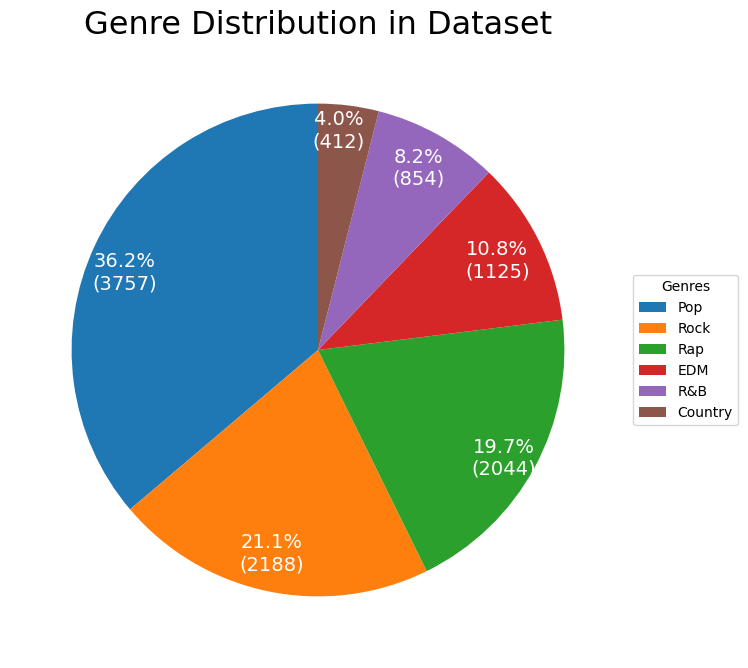

In [25]:
#pie chart of class frequency creation

import matplotlib.pyplot as plt
import numpy as np

# Data setup
genres = ["Pop", "Rock", "Rap", "EDM", "R&B", "Country"]
counts = [3757, 2188, 2044, 1125, 854, 412]
percentages = [count / sum(counts) * 100 for count in counts]  # Calculate percentages

# Pie chart creation with jitter and a legend
def make_pie_chart_with_legend(labels, values, counts):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create the pie chart without slice labels
    wedges, texts, autotexts = ax.pie(
        values, labels=None, startangle=90, autopct="%1.1f%%", pctdistance=0.85
    )
    
    # Apply jitter to the numbers inside the slices
    for i, autotext in enumerate(autotexts):
        jitter_x = np.random.uniform(-0.05, 0.05)  # Adjust the range as needed for more/less jitter
        jitter_y = np.random.uniform(-0.05, 0.05)
        x, y = autotext.get_position()
        autotext.set_position((x + jitter_x, y + jitter_y))
        autotext.set_text(f"{values[i]:.1f}%\n({counts[i]})")  # Show both percentage and count

        # Style the text for better visibility
        autotext.set_color("white")
        autotext.set_fontsize(14)

    # Create the legend
    ax.legend(wedges, labels, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.title("Genre Distribution in Dataset", fontsize=23)
    plt.show()

make_pie_chart_with_legend(genres, percentages, counts)
